# 1 Parameter ODE Challenge

In [34]:
# Imports
using Plots
using Printf
using DataFrames
using CSV

### The ODE

Hey folks! Here's my first ODE parameter challenge to you both. For my ODE, I've chosen a version of the Duffing equation, which is of the form:


$$\ddot{x} = -\varepsilon x - \varepsilon x^3$$

This equation models a non-linear oscillator.

Here $\varepsilon$ is the parameter that you are challenged to figure out my choice of.



### The Data

Along with this Julia notebook, I've also provided a csv file (`duffing_oscillator_data.csv`) of a particular trajectory of this ODE. To read in the data, change the string in line 2 of the cell below to whatever your path is to the csv and then run the cell.

In [35]:
# Read in the data
data = CSV.read("C:\\Users\\walki\\Desktop\\Juila\\duffing_oscillator_data.csv", DataFrame) # change the string to whatever the path to duffing_oscillator_data.csv is for you

# Unpack data into more readable variables
t = data[!,1]
x = data[!,3]
print()

To get a look at this data, you can plot it:

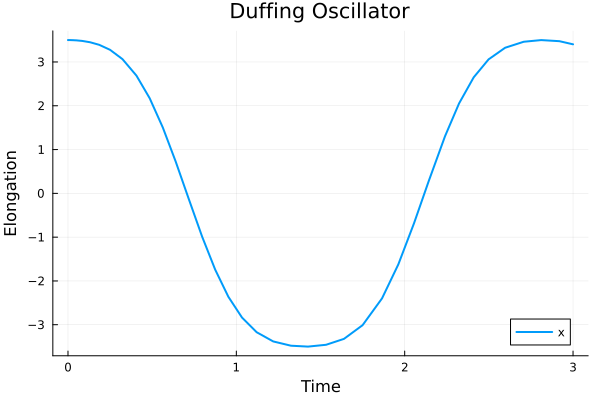

In [36]:
plot(t,x, linewidth = 2, title = "Duffing Oscillator",
     xaxis = "Time", yaxis = "Elongation", label = "x")

If you'd rather work in python, you should be able to read in the data in a similar manner with the Pandas package, with something like this:


```
import pandas as pd

data = pd.read_csv("duffing_oscillator_data.csv")

t = data["timestamp"]
x = data["value2"]


```

Now I leave it to you all to find my choice of $\varepsilon$!

-Alia

In [25]:
ε_range = range(0.5,10, step = 0.5)

0.5:0.5:10.0

In [26]:
using DifferentialEquations
#Initial Conditions and time setup
u₀ = [0.0, 3.5] # xdot_0, x_0,
tspan = (0.0, 3)

#Define the problem - this is the main part that changes with each differential equation
function diffyqs(du, u, p, t)
    x = u[1]
    xdot = u[2]
    du[1] = xdot
    du[2] = -p[1]*x - p[1]*x^3 # actual diffq of interest ( in 2nd order case)
    # could add many more diffyqs here if need be
end

ε = 1.5
sols = []
for ε in ε_range
    # Pass to solvers
    prob = ODEProblem(diffyqs, u₀, tspan,[ε])
    sol = solve(prob, RK4()) # <3 RK4
    push!(sols, sol)
end